# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0382 Деткова Анна. Вариант 29

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

---

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i \neq j$

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

Вычисление цензуса:

$M = \frac{1}{2} trace(𝐗𝐗)$

$A = trace(𝐗𝐗^{T}) - 2M$

$N = C_g^2 - A - M$

---

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга.

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

$\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):\n",

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}$.

---

**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества диад в сети.

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}$, где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$,

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g$,

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$,

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+})$.

---

**Вычисление доверительного интервала для оценки P:**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}$.

ДИ: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{upper} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha$ - некоторый уровень значимости, $(1 - \alpha)$ - доверительная надёжность.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Язык программирования – R.

### 0. Установим  требуемые пакеты. 

In [2]:
install.packages("igraph")
install.packages("network")
install.packages("statnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’




Данные по варианту:

$g=54\\p=0.70\\P_0=0.76\\\alpha=0.02$

In [3]:
g <- 54
p <- 0.70
P.0 <- 0.76
alpha <- 0.02

### 1.  С помощью библиотеки $igraph$ смоделировать случайный орграф $𝒢_d$ на основе модели Эрдеша—Реньи: $𝒢_d = 𝒢 (g, p)$, где $g$ – количество акторов, $p$ – вероятность появления дуги между акторами. В $R$ для модели случайного графа Эрдеша—Реньи существует функция $erdos.renyi.game()$. Ознакомьтесь с данной моделью и опишите её.

In [5]:
library(igraph)
graph <- erdos.renyi.game(g, p, directed = TRUE, type = "gnp")
edgelist <- as_edgelist(graph, names = TRUE)

В модели $\displaystyle G(g,p)$ граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью $p$ независимо от остальных рёбер.

### 2. Отобразить полученный орграф.

Полученный орграф был отображен помощью алгоритма укладки сетей Фрюхтермана-Рейнгольда.

Количество ребер:  2020

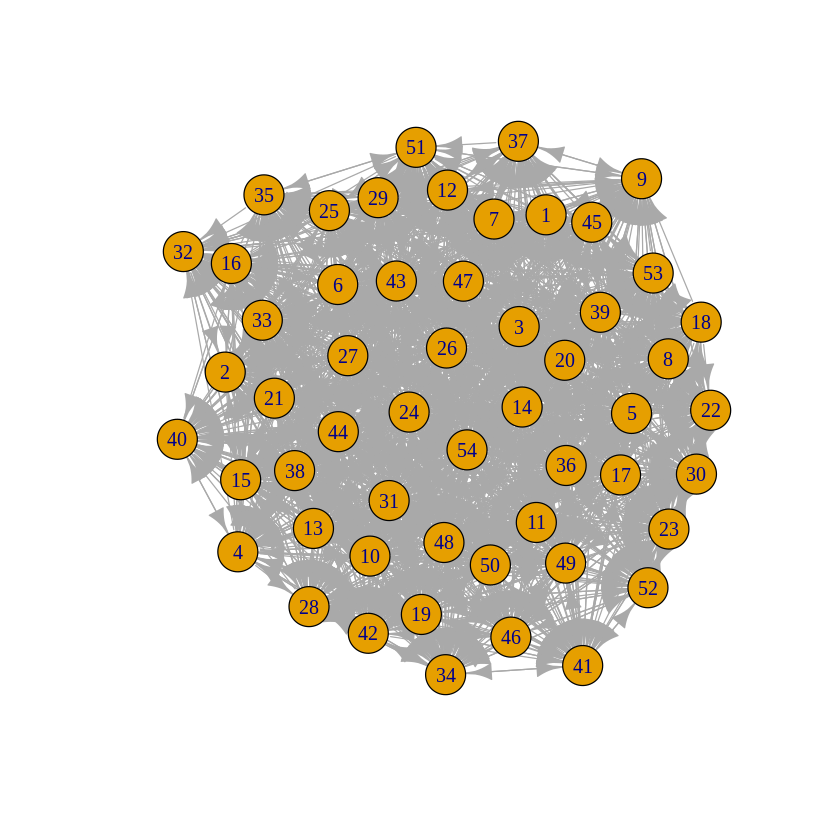

In [6]:
plot(graph, layout = layout_with_fr, label = colnames(graph))
cat("Количество ребер: ", gsize(graph))


### 3. Вычислить «пятичисловую сводку» для графа $𝒢_d$.

In [8]:
library(network)
library(statnet)
network_r <- network(edgelist, matrix.type = "edgelist", directed = TRUE)

library(statnet)
cat("Size of network =", g)
cat("\nDensity =", gden(network_r))
cat("\nComponents:", components(network_r))
cat("\nDiametr = ")
gd <- geodist(network_r)
cat(max(gd$gdist[gd$gdist != Inf]))
cat("\nClustering coefficient =", gtrans(network_r))

Size of network = 54
Density = 0.7058001
Components: 1
Diametr = 2
Clustering coefficient = 0.7062686

### 4. Вычислить цензус диад. Сделать выводы

In [9]:
census <- dyad.census(network_r)
census

Mut,Asym,Null
713,594,124


*Выводы:*

Больше всего взаимных диад (связи между двум акторами двусторонние). Меньше всего нулевых диад (нет связи межды парой акторов). Такой результат вполне согласуется с достаточно высокой вероятностью появления связи (70%).

### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов $d$ и при свободном выборе. Сделать выводы

In [10]:
d <- 27
M <- census[1] #Mut
# оценка по методу моментов
P1 <- (2*M*(g-1) - g*(d**2))/(g*d*(g-1-d))
cat("Индекс взаимности при фиксированном выборе d=27:", P1)

Индекс взаимности при фиксированном выборе d=27: 0.9552601

In [11]:
#свободный выбор
matrix_r <- as.matrix(network_r)
L <- sum(rowSums(matrix_r))
L2 <- sum(rowSums(matrix_r))
# оценка по методу моментов
P2 <- (2*M*((g-1)**2)-L**2 + L2)/(L*((g-1)**2)-L**2+L2)
cat("\nИндекс взаимности при свободном выборе: ", P2)



Индекс взаимности при свободном выборе:  -0.04558591

При фиксированном выборе (d=27) акторы имеют положительную тенденцию к образованию взаимных диад, это подтверждает вычисленный цензус диад (взаимных диад больше всего). При свободном выборе индекс взаимности невысок, что говорит о том, что акторы не имеют тенденции к образованию взаимных диад, но и также акторы не имеют оюратной тенденци, так как индекс очень мал.

### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [12]:
prob1 <- (d**2)/((g-1)**2)
cat("Вероятность, что связь будет взаимной в случае фиксированного выбора: ", prob1)

Вероятность, что связь будет взаимной в случае фиксированного выбора:  0.259523

In [13]:
probs2 <- rowSums(matrix_r) * colSums(matrix_r) / ((g - 1)**2)
prob2 <- sum(probs2) / g
cat("Вероятность, что связь будет взаимной в случае свободного выбора: ", prob2)

Вероятность, что связь будет взаимной в случае свободного выбора:  0.4983255

### 7.  Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [23]:
X.i_plus <- rowSums(matrix_r)

f.func <- function(t) {
  return (sum(X.i_plus[1:t]) - t*(g-1) - choose(t, 2))
}

M.min <- f.func(0)
for (i in 1:g) {
  if (M.min < f.func(i)) {
    M.min <- f.func(i)
  }
}
cat("M_min =", M.min)

g.func <- function(t) {
  return (sum(X.i_plus[1:t]) - t*(t-1) - if (t==g) 0 else sum(min(X.i_plus[(t+1):g], rep(t, (g-t-1+1)))))
}

M.max <- g.func(0)
for (i in 1:g) {
  if (M.max < g.func(i)) {
    M.max <- g.func(i)
  }
}
M.max <- 1/2 * (sum(X.i_plus) - M.max)
cat("\nM_max =", M.max)

Pb <- (M - M.min) / (M.max - M.min)
cat("\nИндекс взаимности Бандиопадхьяйя:", Pb)



M_min = 41
M_max = 832.5
Индекс взаимности Бандиопадхьяйя: 0.8490208

*Выводы:*

Согласно полученному значению индекса взаимности Бандиопадхьяйя - акторы сильно склонны образовывать взаимные связи.

### 8. Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $𝒢_d$ имеет биномиальное распределение $L \sim Bin(g(g − 1), 1/2)$ при уровне значимости $\alpha$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [24]:
binom.test(L, g*(g-1), 1/2)


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 2020, number of trials = 2862, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6887264 0.7224521
sample estimates:
probability of success 
             0.7058001 


Максимальный уровень значимости: $p-value < 2.2e-16,$ он очень мал. Уровень значимости $\alpha = 0.02$ больше чем $p-value$, значит, гипотезу $H_0$ отвергаем. Это логично, так как вероятность появления дуги в графе $\ne \frac 1 2$, а примерно равна $0.7058001$, значение, которое выдал тест, а также это значение совпало с данным нам $p$.

### 9. Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $𝒢_d$ имеет биномиальное распределение $L \sim Bin(g(g − 1), P_0)$ при уровне значимости $\alpha$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [25]:
binom.test(L, g*(g-1), p=P.0)



	Exact binomial test

data:  L and g * (g - 1)
number of successes = 2020, number of trials = 2862, p-value =
3.131e-11
alternative hypothesis: true probability of success is not equal to 0.76
95 percent confidence interval:
 0.6887264 0.7224521
sample estimates:
probability of success 
             0.7058001 


Максимальный уровень значимости: $p-value = 3.131e-11,$ он очень мал. Уровень значимости $\alpha = 0.02$ больше чем $p-value$, значит, гипотезу $H_0$ отвергаем. Это логично, так как вероятность появления дуги в графе $\ne 0.76$, а примерно равна $0.7058001$, значение, которое выдал тест, а также это значение совпало с данным нам $p$.

## 10. Построить доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1-\alpha) = 0.98$. Сделать выводы.

In [31]:
Ф_z_a2 <- 0.5 - alpha/2
z_a2 <- 2.34 # по таблице значений функции Лапласа

cat('Ф(', z_a2 ,') = ', Ф_z_a2, '\n', sep='')

P_hat <- L/((g-1)*g)
P_lower <- P_hat - z_a2 * sqrt((P_hat * (1 - P_hat))/(g * (g - 1)))
P_upper <- P_hat + z_a2 * sqrt((P_hat * (1 - P_hat))/(g * (g - 1)))
cat('Доверительный интервал: (', P_lower, ', ', P_upper, ')', sep='')


Ф(2.34) = 0.49
(0.6858685, 0.7257318)

 Данное по условию значение $p=0.70$ входит в доверительный интервал, следовательно, оценка параметра верная.

## Выводы

В результате выполнения практической работы были получены навыки работы с математическими пакетами для статистического анализа социальных сетей.

Благодаря полученным знаниям можно определять тенденцию создания парных связей в диадах графа через вычисление цензуса диад и подсчёта с помощью него индексов взаимности Каца-Пауэла и Бандиопадхьяйя, а также определять вероятность появления рёбер и, соответсвенно, число рёбер через проверку гипотез о принадлежности числа рёбер в графе биномиальному распределению.